# **Árvores de Decisão**

In [1]:
# importe as principais bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

## **TOC:**
Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) [Introdução](#intro)
- 2) [Arvore de decisao - Exemplo Teorico](#exemplo_teorico)
- 3) [Resampling](#resampling)
- 4) [Utilizando dados categóricos](#categorical)
    - 4.1) [One Hot Encoding](#one_hot)
    - 4.2) [Ordinal Encoding](#ordinal)
- 5) [Arvore de decisao - Exemplo pratico](#exemplo_pratico)
    - 5.1) [Sem oversampling](#without)
    - 5.2) [Com oversampling](#with)
    - 5.3) [Visualizando a árvore de decisão](#visu)

---

## 1) **Introdução** <a class="anchor" id="intro"></a>

Estrutura de uma árvore de decisão:

<center><img src="https://i1.wp.com/www.vooo.pro/insights/wp-content/uploads/2016/12/RDS-Vooo_insights-Tutorial_arvore_de_decisao_02.jpg?resize=640%2C371&ssl=1" width=300></center>

**Exemplo:**

<center><img src="https://didatica.tech/wp-content/uploads/2020/07/image-3.png" width=300></center>

## 2) **Arvore de decisao - Exemplo Teórico** <a class="anchor" id="exemplo_teorico"></a>


__Exemplo__

Digamos que uma amostra de 30 alunos tem duas variáveis: Sexo (menino ou menina), Classe (IX ou X). 

Digamos também que 15 destes 30 jogam tênis no recreio. 

Uma pergunta natural é: **qual feature utilizamos para fazer a quebra do nó raiz: sexo ou classe?**

Há duas quebras possíveis:

<font color="red"> <b>Mudar de 120 para 20</b></font>
<center><img src="figures/decision_tree.png" width=400>></center>

Vemos que, **dependendo da feature que utilizamos pra fazer a quebra**, conseguimos **graus de separações diferentes dos dados com relação ao target**:


<table>
<thead>
  <tr>
    <th colspan="4"><center>Sexo</center></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td colspan="2"><center>Meninas</center></td>
    <td colspan="2"><center>Meninos</center></td>
  </tr>
  <tr>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
  </tr>
  <tr>
    <td><center>2</center></td>
    <td><center>8</center></td>
    <td><center>13</center></td>
    <td><center>7</center></td>
  </tr>
  <tr>
    <td colspan="2"><center>10</center></td>
    <td colspan="2"><center>20</center></td>
  </tr>
</tbody>
</table>


<table>
<thead>
  <tr>
    <th colspan="4"><center>Classe</center></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td colspan="2"><center>IX</center></td>
    <td colspan="2"><center>X</center></td>
  </tr>
  <tr>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
  </tr>
  <tr>
    <td><center>6</center></td>
    <td><center>8</center></td>
    <td><center>9</center></td>
    <td><center>7</center></td>
  </tr>
  <tr>
    <td colspan="2"><center>14</center></td>
    <td colspan="2"><center>16</center></td>
  </tr>
</tbody>
</table>

Como decidir qual das quebrar acima **separou melhor os dados com relação ao target?**

Matematicamente, o modelo pode usar dois critérios diferentes para decidir como fazer as quebras na árvore: o **critério de Gini** ou o **critério da entropia**.

______

**Critério de Gini**

A **impureza de Gini** mede o quão "impuras" são as folhas das árvores construídas após as quebras nos nós. O coeficiente é dado por:

$$Gini(D) = 1 - \sum{p_{i}^2}$$

Onde $p_i$ são as proporções de separação do target em cada quebra.

Aqui estaremos interessados **em como a impureza muda após as quebras**. Nosso objetivo será **maximizar a purificação proporcionada pela quebra nos nós** -- mais precisamente, estamos interessados em determinar **qual é a quebra que proporciona a maior purificação**.

- **Impureza antes da divisão**: Como não havia separação alguma, a impureza era dada simplesmente pelo balanço natural dos dados: 

$$G(\text{pré-divisão}) = 1 - ((15/30)^2 + (15/30)^2) = 0.5$$

Temos duas quebras possíveis:

- Divisão por **sexo**: após a divisão dos dados pela feature **sexo**, passamos a ter as seguintes impurezas, segundo a tabela acima: 

    - $G(\text{meninas}) = 1 - (\frac{2}{10}^2 + \frac{8}{10}^2) = 0.319$
    
    - $G(\text{meninos}) = 1 - ( \frac{13}{20}^2 + \frac{7}{20}^2) = 0.454$
    
    Ou seja, após a divisão, a impureza total passa a ser a média ponderada: 
    
    <br>
    
    - $G(\text{pós-divisão}) = \frac{10}{30} \cdot G(\text{meninas}) + \frac{20}{30} \cdot G(\text{meninos})
    = 0.33 \times 0.319 + 0.66 \times 0.454
    = 0.40491$
    
    Assim, **a perda de impureza proporcionada pela quebra** dos dados segundo a feature **sexo** é de:
    
    <br>
    
    - $\Delta G_{\text{sexo}} = G(\text{pré-divisão}) - G(\text{pós-divisão}) = 0.5 - 0.40491 = $ **0.095**
    
    
<br> 


- Divisão por **classe**: após a divisão dos dados pela feature **classe**, passamos a ter as seguintes impurezas, segundo a tabela acima:

    - $G(\text{IX}) = 1 - (\frac{6}{14}^2 + \frac{8}{14}^2) = 0.489$
    
    - $G(\text{X}) = 1 - ( \frac{9}{16}^2 + \frac{7}{16}^2) = 0.492$
    
    Ou seja, após a divisão, a impureza total passa a ser a média ponderada: 
    
    <br>
    
    - $G(\text{pós-divisão}) = \frac{14}{30} \times G(\text{IX}) + \frac{16}{30} \times G(\text{X})
    = 0.46 \times 0.489 + 0.53 \times 0.492
    = 0.4857$
    
    Assim, **a perda de impureza proporcionada pela quebra** dos dados segundo a feature **classe** é de:
    
    <br>
    
    - $\Delta G_{\text{classe}} = G(\text{pré-divisão}) - G(\text{pós-divisão}) = 0.5 - 0.4857 = $ **0.014**
  
Agora, como escolher a melhor quebra?

> O **critério de Gini** consiste em **escolher a quebra que proporciona a maior perda de impureza**, ou, equivalentemente, **a maior purificação**.

Assim, a divisão a ser escolhida seria por **sexo**. 

Depois, aplica-se o mesmo procedimento para os nós resultantes.

_________

**Critério de entropia**

A **entropia** é uma quantidade definida em física e teoria da informação com o objetivo de quantificar **o grau de desordem de um sistema**, ou, equivalentemente, **o quanto de informação se tem sobre determinado sistema**.

A entropia é dada por:

 $$E = -\sum{p_{i} \times \log_{2}{p_{i}}}$$
 
 
Onde $p_i$ são as proporções de separação do target em cada quebra.

Aqui estaremos interessados **em como a impureza muda após as quebras**. 
 
Aqui também estaremos interessados **em como a entropia muda após as quebras**. Nosso objetivo será **maximizar o ganho de informação proporcionado pela quebra nos nós** -- mais precisamente, estamos interessados em determinar **qual é a quebra que proporciona o maior ganho de informação**.

- **Entropia antes da divisão**: 

$$E(pré-divisão) = \frac{15}{10}log_{2}{\frac{15}{10}} + \frac{15}{10}log_{2}{\frac{15}{10}} = 1$$


Temos duas quebras possíveis:

- Divisão por sexo: 

    - $E(\text{meninas}) = -1 \times (\frac{2}{10} \log_{2}\frac{2}{10} + \frac{8}{10} \log_{2}\frac{8}{10}) = 0.721$
    - $E(\text{meninos}) = -1 \times (\frac{13}{20} \log_{2}\frac{13}{20} + \frac{7}{20} \log_{2}\frac{7}{20}) = 0.934$
    
    A entropia ponderada após a divisão por **sexo** é:
    
    <br>
    
    - $E(\text{pós-divisão}) = \frac{10}{30} \times E(\text{meninas}) + \frac{20}{30} \times E(\text{meninos}) =  0.863$
    
    Assim, o ganho de informação após a divisão por **sexo** é:
    
    <br>
    
    - $\Delta E_{\text{sexo}} = E(\text{pré-divisão}) - E(\text{pós-divisão}) = 1 - 0.863 =$ **0.137**

<br>

- Divisão por classe:

    - $E(\text{IX}) = -1 \times (\frac{6}{14} \log_{2}\frac{6}{14} + \frac{8}{14} \log_{2}\frac{8}{14}) = 0.985$
    - $E(\text{X}) = -1 \times (\frac{9}{16} \log_{2}\frac{9}{16} + \frac{7}{16} \log_{2}\frac{7}{16}) = 0.988$
    
    A entropia ponderada após a divisão por **classe** é:
    
    <br>
    
    - $E(\text{pós-divisão}) = \frac{10}{30} \times E(\text{IX}) + \frac{20}{30} \times E(\text{X}) =  0.986$
    
    Assim, o ganho de informação após a divisão por **classe** é:
    
    <br>
    
    - $\Delta E_{\text{classe}} = E(\text{pré-divisão}) - E(\text{pós-divisão}) = 1 - 0.986 =$ **0.014**

Também pela entropia, a divisão a ser escolhida seria por **sexo**. 

Depois, aplica-se o mesmo procedimento para os nós resultantes, até obter-se nós puros.

____

__Qual a diferença entre os dois critérios?__

A origem, e pequenas diferenças computacionais. 

Apesar das medidas serem semelhantes, é possível que haja sim diferenças nos resultados gerados por cada um deles!

<center><img src="https://qph.fs.quoracdn.net/main-qimg-3f3484dc9513748c3283fa0d1d996e82" width=400>
</center>
Como dica geral: teste ambos! O Grid Search pode sempre nos ajudar a determinar qual dos dois é mais adequado em cada caso!

Vamos a nosso exemplo prático?

Para o exempçlo de árvore de descisão iremos utilizar um [dataset de Marketing bancário](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). Ele demonstra valores de campanha de telemarketing de banco portugues. O objetivo e prever se o cliente assinará um termo de depósito, com base nas features.

In [2]:
# leia os dados, que devem estar em '../datasets/bank-full.csv'
# é necessário usar o separador ";"
df = pd.read_csv('data/bank_full.csv', sep=";")

In [3]:
df.sample(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
17158,31,technician,married,tertiary,no,19,yes,no,cellular,28,jul,243,31,-1,0,unknown,no
35385,40,blue-collar,married,primary,no,32,yes,no,cellular,7,may,102,1,-1,0,unknown,no
27680,56,blue-collar,married,secondary,no,1521,yes,yes,cellular,21,nov,19,2,179,3,other,no
38403,42,blue-collar,married,secondary,no,505,yes,no,cellular,15,may,117,1,-1,0,unknown,no


In [4]:
# dê uma olhada na base (info, describe, etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# dados missing?
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# PARA CASA: faça a análise exploratória!

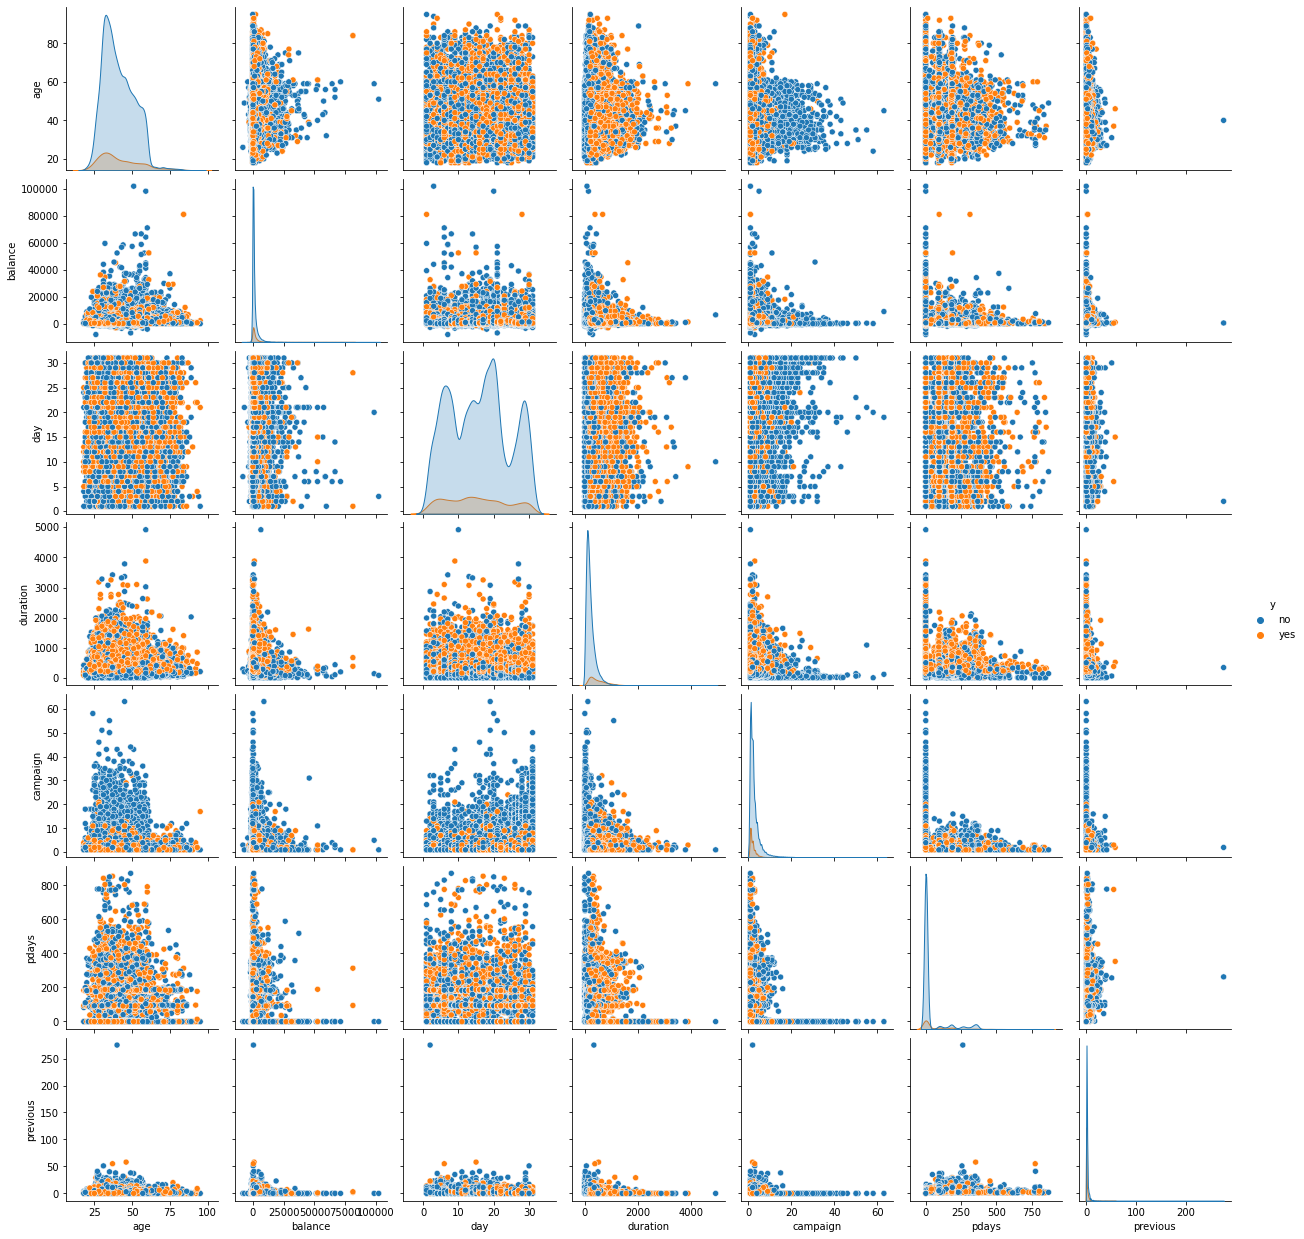

In [8]:
# faça um pairplot com o hue para avaliar a separabilidade dos dados
sns.pairplot(df, hue="y")
plt.show()

In [9]:
# há claramente um outlier na coluna "previous"
# esta coluna é: "number of contacts performed before this campaign and for this client"
# identifique e remova este outlier
df = df[~(df["previous"] > 250)]

In [10]:
# dê uma olhada na distribuição do target

df["y"].value_counts()

no     39921
yes     5289
Name: y, dtype: int64

Há um desbalanço considerável... Como podemos resolver isso?


---

## 3) **Resampling** <a class="anchor" id="resampling"></a>

Exitem duas técnicas principais de reamostragem: 

- **Oversampling:** Esse método consiste em replicar os dados da classe minoritária, até que o balanço seja alcançado:

- **Undersampling:** Este método consiste em criar uma nova amostra **dos dados que estão na classe majoritária**, de modo que o balanço seja alcançado.


<center><img src="https://miro.medium.com/max/725/0*FeIp1t4uEcW5LmSM.png" width=600></center>

Para mais detalhes sobre estas técnicas, e como fazê-las com uma biblioteca, [clique aqui](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/). Obs.: note que uma estratégia interessante é utilizar ambos o undersampling e o oversampling juntos!

In [11]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

In [12]:
X = df.drop(columns = "y")
y = df.loc[:,"y"]

In [13]:
X_res, y_res = rus.fit_resample(X, y)

In [14]:
print(f"X:{X.shape}, X_res:{X_res.shape}")
print(f"y:{y.shape}, y_res:{y_res.shape}")

X:(45210, 16), X_res:(10578, 16)
y:(45210,), y_res:(10578,)


In [15]:
y_res.value_counts()

no     5289
yes    5289
Name: y, dtype: int64

Consegue fazer um exemplo de oversampling?

---

## 4) **Utilizando dados categóricos** <a class="anchor" id="categorical"></a>

Chegou o momento de aprendermos uma forma de utilizar dados categóricos!

### 4.1) **One-hot encoding** <a class="anchor" id="one_hot"></a>

Outra forma extremamente comum de utilizar variáveis categóricas é através da criação de **variáveis mudas** (dummy variables)

<center><img src="https://miro.medium.com/max/2474/1*ggtP4a5YaRx6l09KQaYOnw.png" width=500></center>

Isso é facilmente feito com o pandas utilizando a função [pd.get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [16]:
pd.get_dummies(df)[["y_yes", "y_no"]].sample(2)

,y_yes,y_no
11059,0,1
17261,0,1


Mas note que há uma redundância nas colunas! Para resolver isso, podemos utilizar o argumento drop_first=True:

In [17]:
pd.get_dummies(df, drop_first=True)["y_yes"].value_counts()

0    39921
1     5289
Name: y_yes, dtype: int64

O sklearn também tem uma forma de realizar a mesma operação utilizando a classe **OneHotEncoder**.

In [18]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
result = one_hot_encoder.fit_transform(df["y"].values.reshape(-1, 1))
print(result.shape)
pd.DataFrame(result)[1].value_counts()

(45210, 2)


0.0    39921
1.0     5289
Name: 1, dtype: int64

### **Ordinal encoding** <a class="anchor" id="ordinal"></a>
<center><img src="https://miro.medium.com/max/654/1*NUzgzszTdpLPZpeKPPf0kQ.png" width=200></center>

In [19]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
result = ordinal_encoder.fit_transform(df["y"].values.reshape(-1,1))
print(result.shape)
pd.DataFrame(result)[0].value_counts()

(45210, 1)


0.0    39921
1.0     5289
Name: 0, dtype: int64

Perceba que eles são diferentes, nesse caso como estavamos mexendo com uma variável binária eles fizeram a mesma transformação nos nossos dados. 

## 5) **Arvore de decisao - Exemplo Prático** <a class="anchor" id="exemplo_pratico"></a>

_____

Usar uma pipeline que vai tratar os dados numéricos e categóricos nominais diferentemente. Além disso, vamos também utilizar uma classe que faz undersample dos dados na nossa pipeline.

Obs.: Vamos utilizar [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) e [FeatureUnion](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html).



### 5.1) **Sem oversampling** <a class="anchor" id="without"></a>

In [20]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


X = df.drop(columns='y')
y = df['y'].astype("category").cat.codes

# redefinir pra poder alterar novamente
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

numerical_columns = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_nominal_columns = ["job", "marital", "poutcome"]

# apenas as colunas com features categóricas
one_hot_transformer = Pipeline([('onehot', OneHotEncoder(drop="first"))])
preprocessor_categorical_nominal = ColumnTransformer(transformers=[('cat_nominal', 
                                                                     one_hot_transformer, 
                                                                     categorical_nominal_columns)])

standirizer_transformer = Pipeline([
                                    ('imp_miss', SimpleImputer(strategy='constant')),
                                    ('standarizer', StandardScaler())
                                  ])
preprocessor_numerical = ColumnTransformer(transformers=[('numerical', 
                                                          standirizer_transformer, 
                                                          numerical_columns)])

processor_pipe = FeatureUnion([
                           ("preprocessor1", preprocessor_categorical_nominal),
                           ("preprocessor2", preprocessor_numerical)
                          ])

pipe = Pipeline([("processor_pipe", processor_pipe),
                 ("dt", DecisionTreeClassifier())])

pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     13134
           1       0.39      0.41      0.40      1786

    accuracy                           0.85     14920
   macro avg       0.66      0.66      0.66     14920
weighted avg       0.86      0.85      0.85     14920



Fazendo grid_search:

In [21]:
param_grid = {'dt__criterion' : ["gini", "entropy"],
              'dt__splitter' : ['best'],
              'dt__min_samples_split' : range(4, 6),
              'dt__min_samples_leaf' : range(4, 6)}

grid = GridSearchCV(pipe, param_grid, scoring="f1_weighted", cv=5)

modelo = grid.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

###########################################################################

print("Matriz de confusão do modelo nos dados de teste:\n")
print(confusion_matrix(y_test, y_pred))

print("\nMatriz de confusão do modelo nos dados de teste:\n")
print(classification_report(y_test, y_pred))

Matriz de confusão do modelo nos dados de teste:

[[12353   781]
 [ 1084   702]]

Matriz de confusão do modelo nos dados de teste:

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     13134
           1       0.47      0.39      0.43      1786

    accuracy                           0.88     14920
   macro avg       0.70      0.67      0.68     14920
weighted avg       0.87      0.88      0.87     14920



### 5.2) **Com oversampling** <a class="anchor" id="with"></a>

In [22]:
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

X = df.drop(columns='y')
y = df['y'].astype("category").cat.codes

# redefinir pra poder alterar novamente
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

numerical_columns = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_nominal_columns = ["job", "marital", "poutcome"]

# apenas as colunas com features categóricas
one_hot_transformer = Pipeline([('onehot', OneHotEncoder(drop="first"))])
preprocessor_categorical_nominal = ColumnTransformer(transformers=[('cat_nominal', 
                                                                     one_hot_transformer, 
                                                                     categorical_nominal_columns)])

standirizer_transformer = Pipeline([
                                    ('imp_miss', SimpleImputer(strategy='constant')),
                                    ('standarizer', StandardScaler())
                                  ])
preprocessor_numerical = ColumnTransformer(transformers=[('numerical', 
                                                          standirizer_transformer, 
                                                          numerical_columns)])

processor_pipe = FeatureUnion([
                           ("preprocessor1", preprocessor_categorical_nominal),
                           ("preprocessor2", preprocessor_numerical)
                          ])

pipe = Pipeline([("resample", RandomOverSampler()),
                 ("processor_pipe", processor_pipe),
                 ("dt", DecisionTreeClassifier())])

pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     13134
           1       0.39      0.37      0.38      1786

    accuracy                           0.86     14920
   macro avg       0.65      0.65      0.65     14920
weighted avg       0.85      0.86      0.85     14920



In [23]:
param_grid = {'dt__criterion' : ["gini", "entropy"],
              'dt__splitter' : ['best'],
              'dt__min_samples_split' : range(4, 6),
              'dt__min_samples_leaf' : range(4, 6)}

grid = GridSearchCV(pipe, param_grid, scoring="f1_weighted", cv=5)

modelo = grid.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

###########################################################################


print("Matriz de confusão do modelo nos dados de teste:\n")
print(confusion_matrix(y_test, y_pred))

print("\nMatriz de confusão do modelo nos dados de teste:\n")
print(classification_report(y_test, y_pred))

Matriz de confusão do modelo nos dados de teste:

[[11818  1316]
 [  942   844]]

Matriz de confusão do modelo nos dados de teste:

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     13134
           1       0.39      0.47      0.43      1786

    accuracy                           0.85     14920
   macro avg       0.66      0.69      0.67     14920
weighted avg       0.86      0.85      0.85     14920



In [24]:
grid.best_params_

{'dt__criterion': 'entropy',
 'dt__min_samples_leaf': 4,
 'dt__min_samples_split': 5,
 'dt__splitter': 'best'}

Uma outra forma de buscar por hiperparâmetros é através **de uma busca aleatória**, o que pode ser feito através do [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

A diferença entre este buscador e o GridSearch, é que neste caso não explicitamos a lista com os valores dos hiperparâmetros a sere, combinados, mas passamos **os valores possíveis dos hiperparâmetros, que são amostrados aleatoriamente de modo a gerar combinações aleatórias!** Aí, ao invés de tentarmos todas as combinações possíveis, testamos apenas **um número determinado de combinações aleatoriamente amostradas das distribuições!**

Para mais informações sobre este método, [clique aqui!](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-search).

[Veja aqui](https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html) uma comparação entre os dois métodos.

Em algumas situações, pode ser que a busca aleatória seja mais eficiente que o grid search, dado seu caráter aleatório!

_______

### 5.3) **Visualizando a árvore de decisão** <a class="anchor" id="visu"></a>

É possível visualizar a árvore de decisão criada com o próprio sklearn!

Para isso, basta usar a função `plot_tree()` do sub-módulo tree, conforme abaixo!

Para mais detalhes sobre como plotar a árvore, [clique aqui](https://scikit-learn.org/stable/modules/tree.html#tree)

In [25]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop(columns='y')
y = df['y'].astype("category").cat.codes

# redefinir pra poder alterar novamente
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train[numerical_columns], y_train)

DecisionTreeClassifier(max_depth=3)

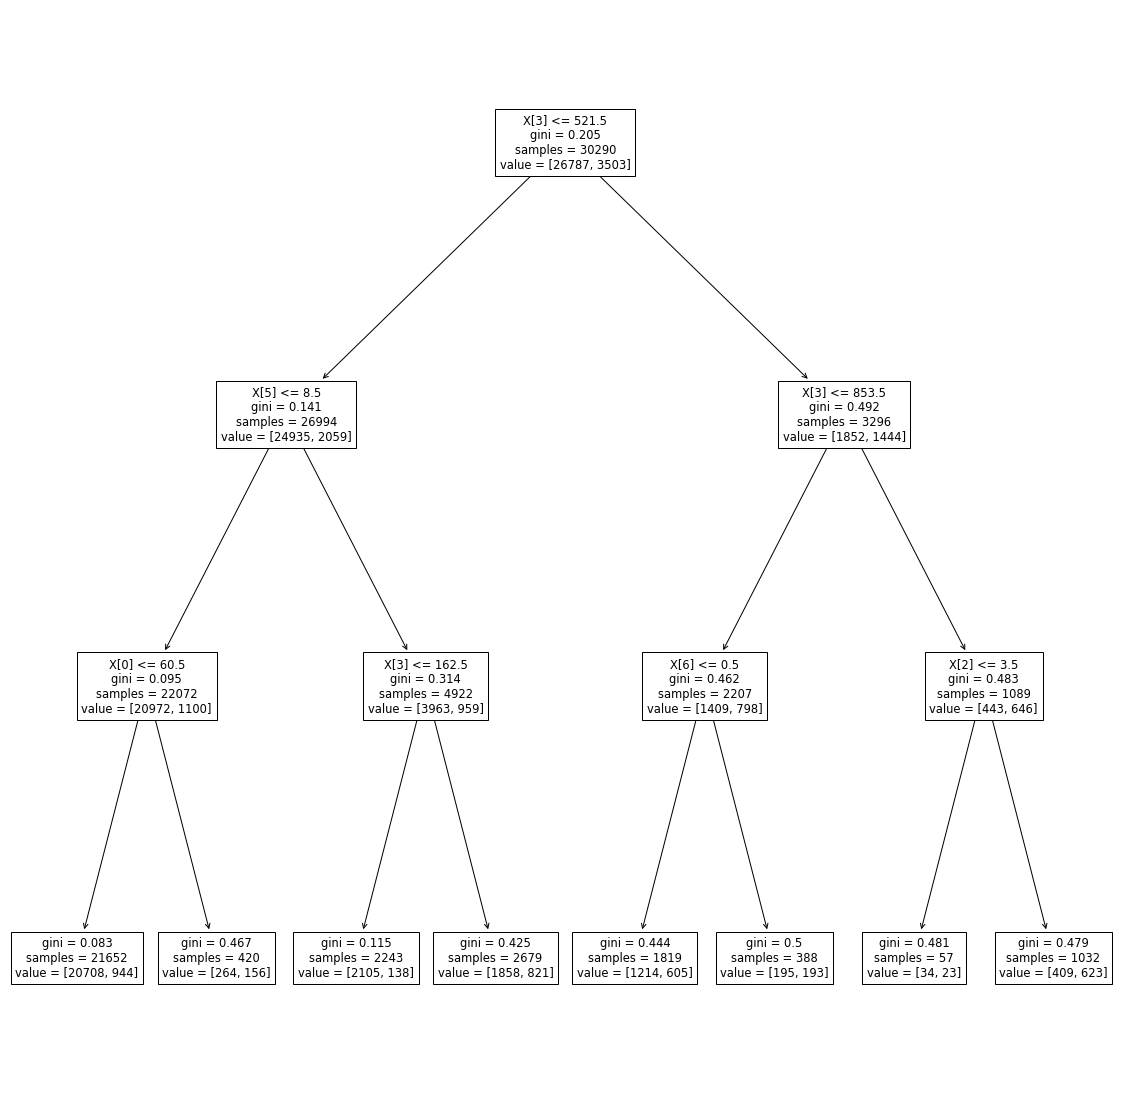

In [26]:
from sklearn import tree

plt.figure(figsize=(20, 20))
tree.plot_tree(model)
plt.show()